In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")

In [3]:
data = "texas"
k_list = [2, 3, 4, 5]

In [4]:
class NHS_Utility:
    def __init__(self, data, k_list):
        self.data = data
        self.k_list = k_list
    
    def get_features(self):
        self.features = []
        self.val = []
        for k in self.k_list:
            _, X_org, y_org, _, X_anon, y_anon = encodeData(self.data, k, method='nhs')
            if not len(self.features):
                self.features.append((X_org, y_org))
            self.features.append((X_anon, y_anon))
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='adam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.k_list) + 1):
            X, y = self.features[i]
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
            history = self.models[i].fit(X, y, epochs=100, batch_size=64, validation_data=self.val_data, callbacks=[callback])
            self.histories.append(history)
            if i == 0:
                self.models[i].save(f"./nhs_weights/model_{self.data}_org.h5")
            else:
                self.models[i].save(f"./nhs_weights/model_{self.data}_{k_list[i-1]}.h5")
            print(f"{i+1} trained.")
            

In [5]:
nhs_util = NHS_Utility(data, k_list)

In [6]:
nhs_util.prepare_training()

Replacing all generalized values...


25532it [00:01, 25203.90it/s]


Replacing all generalized values...


16610it [00:00, 25869.22it/s]


Replacing all generalized values...


12590it [00:00, 25692.58it/s]


Replacing all generalized values...


10170it [00:00, 25434.65it/s]


Replacing all generalized values...


75555it [00:02, 25654.78it/s]


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-12-01 17:07:06.741740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 17:07:06.741866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
nhs_util.train()

Epoch 1/100


2023-12-01 17:07:32.215788: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-01 17:07:32.411420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 0.6678

2023-12-01 17:07:44.095637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 17s 14ms/step - loss: 0.6678 - val_loss: 0.5710
Epoch 2/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.5486 - val_loss: 0.5247
Epoch 3/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.5150 - val_loss: 0.4605
Epoch 4/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.4924 - val_loss: 0.4582
Epoch 5/100
1181/1181 [==============================] - 15s 13ms/step - loss: 0.4840 - val_loss: 0.4357
Epoch 6/100
1181/1181 [==============================] - 15s 13ms/step - loss: 0.4561 - val_loss: 0.4416
Epoch 7/100
1181/1181 [==============================] - 15s 13ms/step - loss: 0.4482 - val_loss: 0.3904
Epoch 8/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.4368 - val_loss: 0.3920
Epoch 9/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.4089 - val_loss: 0.3782
Epoch 10/100
1181/1181 [==============================] - 16s 13ms/

2023-12-01 17:33:53.449596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - ETA: 0s - loss: 0.7008

2023-12-01 17:33:59.011293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 11s 26ms/step - loss: 0.7008 - val_loss: 1.0330
Epoch 2/100
399/399 [==============================] - 9s 22ms/step - loss: 0.6301 - val_loss: 1.2159
Epoch 3/100
399/399 [==============================] - 9s 22ms/step - loss: 0.6109 - val_loss: 1.1583
Epoch 4/100
399/399 [==============================] - 9s 22ms/step - loss: 0.5967 - val_loss: 1.1919
Epoch 5/100
399/399 [==============================] - 9s 22ms/step - loss: 0.5895 - val_loss: 1.6764
Epoch 6/100
399/399 [==============================] - 9s 23ms/step - loss: 0.5825 - val_loss: 1.2556
Epoch 7/100
399/399 [==============================] - 8s 21ms/step - loss: 0.5761 - val_loss: 1.2348
Epoch 8/100
399/399 [==============================] - 9s 23ms/step - loss: 0.5633 - val_loss: 1.3591
Epoch 9/100
399/399 [==============================] - 9s 22ms/step - loss: 0.5613 - val_loss: 1.5039
Epoch 10/100
399/399 [==============================] - 9s 22ms/step - loss: 0.5579 - val_los

2023-12-01 17:35:32.255500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


260/260 [==============================] - ETA: 0s - loss: 0.6961

2023-12-01 17:35:35.494977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


260/260 [==============================] - 8s 30ms/step - loss: 0.6961 - val_loss: 1.3607
Epoch 2/100
260/260 [==============================] - 7s 28ms/step - loss: 0.6090 - val_loss: 1.3600
Epoch 3/100
260/260 [==============================] - 7s 29ms/step - loss: 0.5995 - val_loss: 1.5082
Epoch 4/100
260/260 [==============================] - 7s 27ms/step - loss: 0.5882 - val_loss: 1.4729
Epoch 5/100
260/260 [==============================] - 8s 29ms/step - loss: 0.5806 - val_loss: 1.8351
Epoch 6/100
260/260 [==============================] - 7s 28ms/step - loss: 0.5773 - val_loss: 1.6454
Epoch 7/100
260/260 [==============================] - 7s 29ms/step - loss: 0.5727 - val_loss: 1.8617
Epoch 8/100
260/260 [==============================] - 7s 28ms/step - loss: 0.5682 - val_loss: 1.6761
Epoch 9/100
260/260 [==============================] - 7s 28ms/step - loss: 0.5602 - val_loss: 1.5942
Epoch 10/100
260/260 [==============================] - 7s 28ms/step - loss: 0.5589 - val_loss

2023-12-01 17:37:01.399011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 0.7661

2023-12-01 17:37:03.849617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 7s 36ms/step - loss: 0.7661 - val_loss: 1.2279
Epoch 2/100
197/197 [==============================] - 7s 35ms/step - loss: 0.6537 - val_loss: 1.4971
Epoch 3/100
197/197 [==============================] - 7s 33ms/step - loss: 0.6375 - val_loss: 1.7909
Epoch 4/100
197/197 [==============================] - 7s 35ms/step - loss: 0.6299 - val_loss: 1.3751
Epoch 5/100
197/197 [==============================] - 7s 35ms/step - loss: 0.6206 - val_loss: 1.9260
Epoch 6/100
197/197 [==============================] - 7s 34ms/step - loss: 0.6208 - val_loss: 2.1848
Epoch 7/100
197/197 [==============================] - 7s 35ms/step - loss: 0.6201 - val_loss: 1.8630
Epoch 8/100
197/197 [==============================] - 6s 33ms/step - loss: 0.6043 - val_loss: 1.8052
Epoch 9/100
197/197 [==============================] - 7s 35ms/step - loss: 0.6037 - val_loss: 1.5512
Epoch 10/100
197/197 [==============================] - 7s 33ms/step - loss: 0.6001 - val_loss

2023-12-01 17:38:16.014683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - ETA: 0s - loss: 0.7286

2023-12-01 17:38:18.241186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 7s 43ms/step - loss: 0.7286 - val_loss: 1.1667
Epoch 2/100
159/159 [==============================] - 6s 39ms/step - loss: 0.6362 - val_loss: 1.7022
Epoch 3/100
159/159 [==============================] - 6s 41ms/step - loss: 0.5950 - val_loss: 2.0859
Epoch 4/100
159/159 [==============================] - 6s 38ms/step - loss: 0.6005 - val_loss: 1.5639
Epoch 5/100
159/159 [==============================] - 7s 41ms/step - loss: 0.5840 - val_loss: 2.0545
Epoch 6/100
159/159 [==============================] - 6s 41ms/step - loss: 0.5767 - val_loss: 2.7188
Epoch 7/100
159/159 [==============================] - 6s 41ms/step - loss: 0.5608 - val_loss: 2.3624
Epoch 8/100
159/159 [==============================] - 6s 41ms/step - loss: 0.5570 - val_loss: 2.5253
Epoch 9/100
159/159 [==============================] - 6s 39ms/step - loss: 0.5628 - val_loss: 2.9651
Epoch 10/100
159/159 [==============================] - 6s 41ms/step - loss: 0.5504 - val_loss

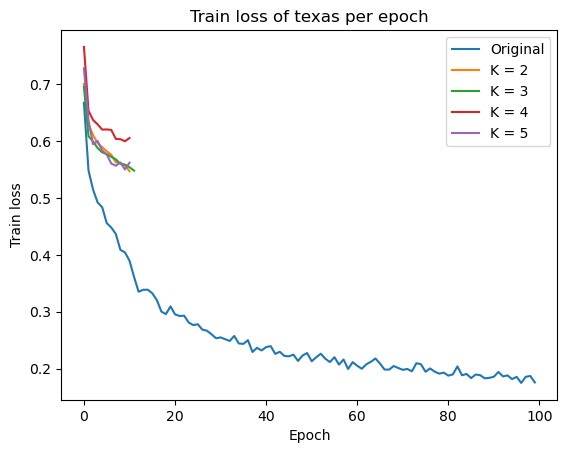

In [10]:
for i in range(len(nhs_util.histories)):
    if i == 0:
        plt.plot(nhs_util.histories[i].history['loss'], label="Original")
    else:
        plt.plot(nhs_util.histories[i].history['loss'], label=f"K = {nhs_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel(f"Train loss")
plt.title(f"Train loss of {data} per epoch")
plt.legend()
plt.show()

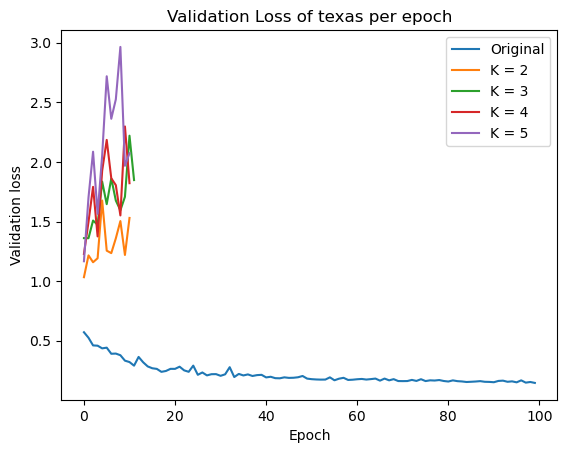

In [16]:
for i in range(len(nhs_util.histories)):
    if i == 0:
        plt.plot(nhs_util.histories[i].history['val_loss'], label="Original")
    else:
        plt.plot(nhs_util.histories[i].history['val_loss'], label=f"K = {nhs_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.title(f"Validation Loss of {data} per epoch")
plt.legend()
plt.show()

In [13]:
test_accs = {}
_, X_test, y_test = encodeNonAnonData(data, f"/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{data}/test.csv")
for i in range(len(nhs_util.k_list) + 1):
    if i == 0:
        nhs_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_org.h5")
    else:
        nhs_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_{k_list[i-1]}.h5")
    X, y = nhs_util.features[i]
    res = nhs_util.models[i].evaluate(X_test, y_test, verbose=0)
    if i == 0:
        test_accs["Original"] = res
    else:
        test_accs[f"K = {k_list[i-1]}"] = res

Replacing all generalized values...


75555it [00:03, 24536.94it/s]


   9/2362 [..............................] - ETA: 16s - loss: 0.1235 

2023-12-01 17:41:04.722059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  22/2362 [..............................] - ETA: 11s - loss: 0.8224

2023-12-01 17:41:16.882386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  23/2362 [..............................] - ETA: 11s - loss: 1.2683

2023-12-01 17:41:28.408204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  17/2362 [..............................] - ETA: 15s - loss: 2.5550

2023-12-01 17:41:39.745486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  22/2362 [..............................] - ETA: 11s - loss: 1.7964

2023-12-01 17:41:51.736556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 12s 5ms/step - loss: 2.3392


Text(0, 0.5, 'MSE Loss')

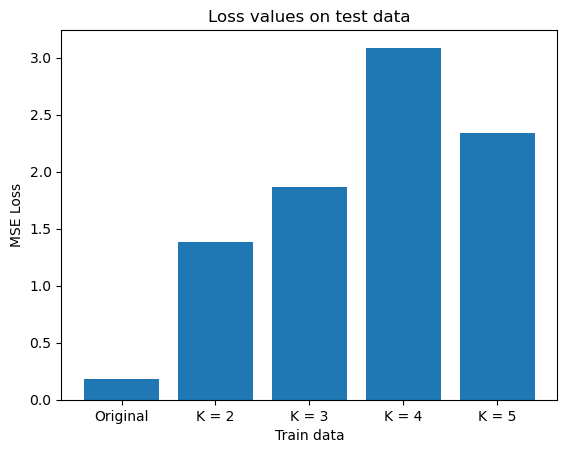

In [15]:
names = ["Original"] + [f"K = {k}" for k in k_list]
height = [test_accs[name] for name in names]
plt.bar(names, height)
plt.title("Loss values on test data")
plt.xlabel("Train data")
plt.ylabel("MSE Loss")